In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
twitch_global_data = pd.read_csv('/kaggle/input/evolution-of-top-games-on-twitch/Twitch_global_data.csv')
twitch_global_data.tail()

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,Viewer_ratio
80,2022,9,1817119612,2527287,4678056,22278079,90376,41863,28.37
81,2022,10,1883320673,2534751,4610799,22867973,90557,42164,28.35
82,2022,11,1694262814,2356415,5362892,21744817,88195,41058,26.84
83,2022,12,1674092138,2253152,3866814,21753674,84728,41548,27.00
84,2023,1,1866962462,2512735,5593050,24429476,93349,43611,27.44


**Check Shape of the dataframe**

In [3]:
twitch_global_data.shape

(85, 9)

**Check for missing values**

In [4]:
twitch_global_data.isnull().sum()

year              0
Month             0
Hours_watched     0
Avg_viewers       0
Peak_viewers      0
Streams           0
Avg_channels      0
Games_streamed    0
Viewer_ratio      0
dtype: int64

**Check data types for the features in this dataframe**

In [5]:
twitch_global_data.dtypes

year                int64
Month               int64
Hours_watched       int64
Avg_viewers         int64
Peak_viewers        int64
Streams             int64
Avg_channels        int64
Games_streamed      int64
Viewer_ratio      float64
dtype: object

## Process Data

In [6]:
# Since we don't have a full year of data for 2023 we will drop 2023 data
twitch_global_data = twitch_global_data[twitch_global_data['year'] != 2023]

## EDA

In [7]:
# Visualize the data
import plotly.express as px
import plotly.graph_objects as go

# Create a Bar Chart of Hours Watched by Month
fig = px.bar(twitch_global_data, x='Month', y='Hours_watched', color='Month', title='Hours Watched by Month')
fig.show()

In [8]:
# create a scatter plot of Hours Watched by Month
fig = px.scatter(twitch_global_data, x='Month', y='Hours_watched', color='Month', title='Hours Watched by Month', trendline='ols')
fig.show()

In [9]:
# Create a Bar Chart of Hours Watched by Year
fig = px.bar(twitch_global_data, x='year', y='Hours_watched', color='year', title='Hours Watched by Year')
fig.show()

In [10]:
# create a scatter plot of Hours Watched by Year
fig = px.scatter(twitch_global_data, x='year', y='Hours_watched', color='year', title='Hours Watched by Year', trendline='ols')
fig.show()

In [11]:
# Hours Watched by Average Viewers
fig = px.bar(twitch_global_data, x='year', y='Avg_viewers', color='year', title='Average Viewers by Year')
fig.show()

In [12]:
# Create a scatter plot of Hours Watched by Average Viewers
fig = px.scatter(twitch_global_data, x='Avg_viewers', y='Hours_watched', color='year', title='Hours Watched by Average Viewers', trendline='ols')
fig.show()

In [13]:
# Hours Watched by Average Channels
fig = px.bar(twitch_global_data, x='year', y='Avg_channels', color='year', title='Average Channels by Year')
fig.show()

In [14]:
# create a correlation matrix
corr = twitch_global_data.corr()

# plot the correlation matrix
fig = go.Figure(data=go.Heatmap(
                     z=corr.values,
                        x=corr.index.values,
                        y=corr.columns.values,
                        colorscale='plasma'))
fig.update_layout(title='Correlation Matrix')
fig.show()

# sort the correlation matrix by the target variable
corr['Hours_watched'].sort_values(ascending=False)

Hours_watched     1.000000
Avg_viewers       0.998246
Avg_channels      0.986006
Peak_viewers      0.953617
Streams           0.941777
Games_streamed    0.941316
year              0.933889
Month             0.019107
Viewer_ratio     -0.075718
Name: Hours_watched, dtype: float64

**There is an issue with Multicollinearity, remove highly correlated columns and combine other correlated features**

In [15]:
# drop Avg_viewers
twitch_global_data = twitch_global_data.drop(['Avg_viewers'], axis=1)

In [16]:
# Create a new column that is the ratio of Avg_channels and Games Streamed
twitch_global_data['Avg_channels/Games_streamed'] = twitch_global_data['Avg_channels']/twitch_global_data['Games_streamed']

# drop Avg_channels and Games_streamed
twitch_global_data = twitch_global_data.drop(['Avg_channels', 'Games_streamed'], axis=1)

In [17]:
# create a correlation matrix
corr = twitch_global_data.corr()

# plot the correlation matrix
fig = go.Figure(data=go.Heatmap(
                        z=corr.values,
                        x=corr.index.values,
                        y=corr.columns.values,
                        colorscale='plasma'))
fig.update_layout(title='Correlation Matrix')
fig.show()

# sort the correlation matrix by the target variable
corr['Hours_watched'].sort_values(ascending=False)

Hours_watched                  1.000000
Peak_viewers                   0.953617
Streams                        0.941777
year                           0.933889
Avg_channels/Games_streamed    0.726321
Month                          0.019107
Viewer_ratio                  -0.075718
Name: Hours_watched, dtype: float64

In [18]:
# describe the data
twitch_global_data.describe()

,year,Month,Hours_watched,Peak_viewers,Streams,Viewer_ratio,Avg_channels/Games_streamed
count,84.000000,84.000000,8.400000e+01,8.400000e+01,8.400000e+01,84.000000,84.000000
mean,2019.000000,6.500000,1.163283e+09,3.282939e+06,1.532771e+07,26.771310,2.306640
std,2.012012,3.472786,6.208308e+08,1.628170e+06,6.199387e+06,1.596809,0.672692
min,2016.000000,1.000000,3.628332e+08,1.186009e+06,5.507554e+06,22.650000,1.211714
25%,2017.000000,3.750000,5.749480e+08,1.818458e+06,8.636242e+06,25.687500,1.655825
50%,2019.000000,6.500000,9.085133e+08,2.661460e+06,1.502932e+07,26.885000,2.262469
75%,2021.000000,9.250000,1.821550e+09,4.787772e+06,2.022390e+07,28.152500,2.669941
max,2022.000000,12.000000,2.308295e+09,6.707070e+06,2.759115e+07,30.390000,3.956765


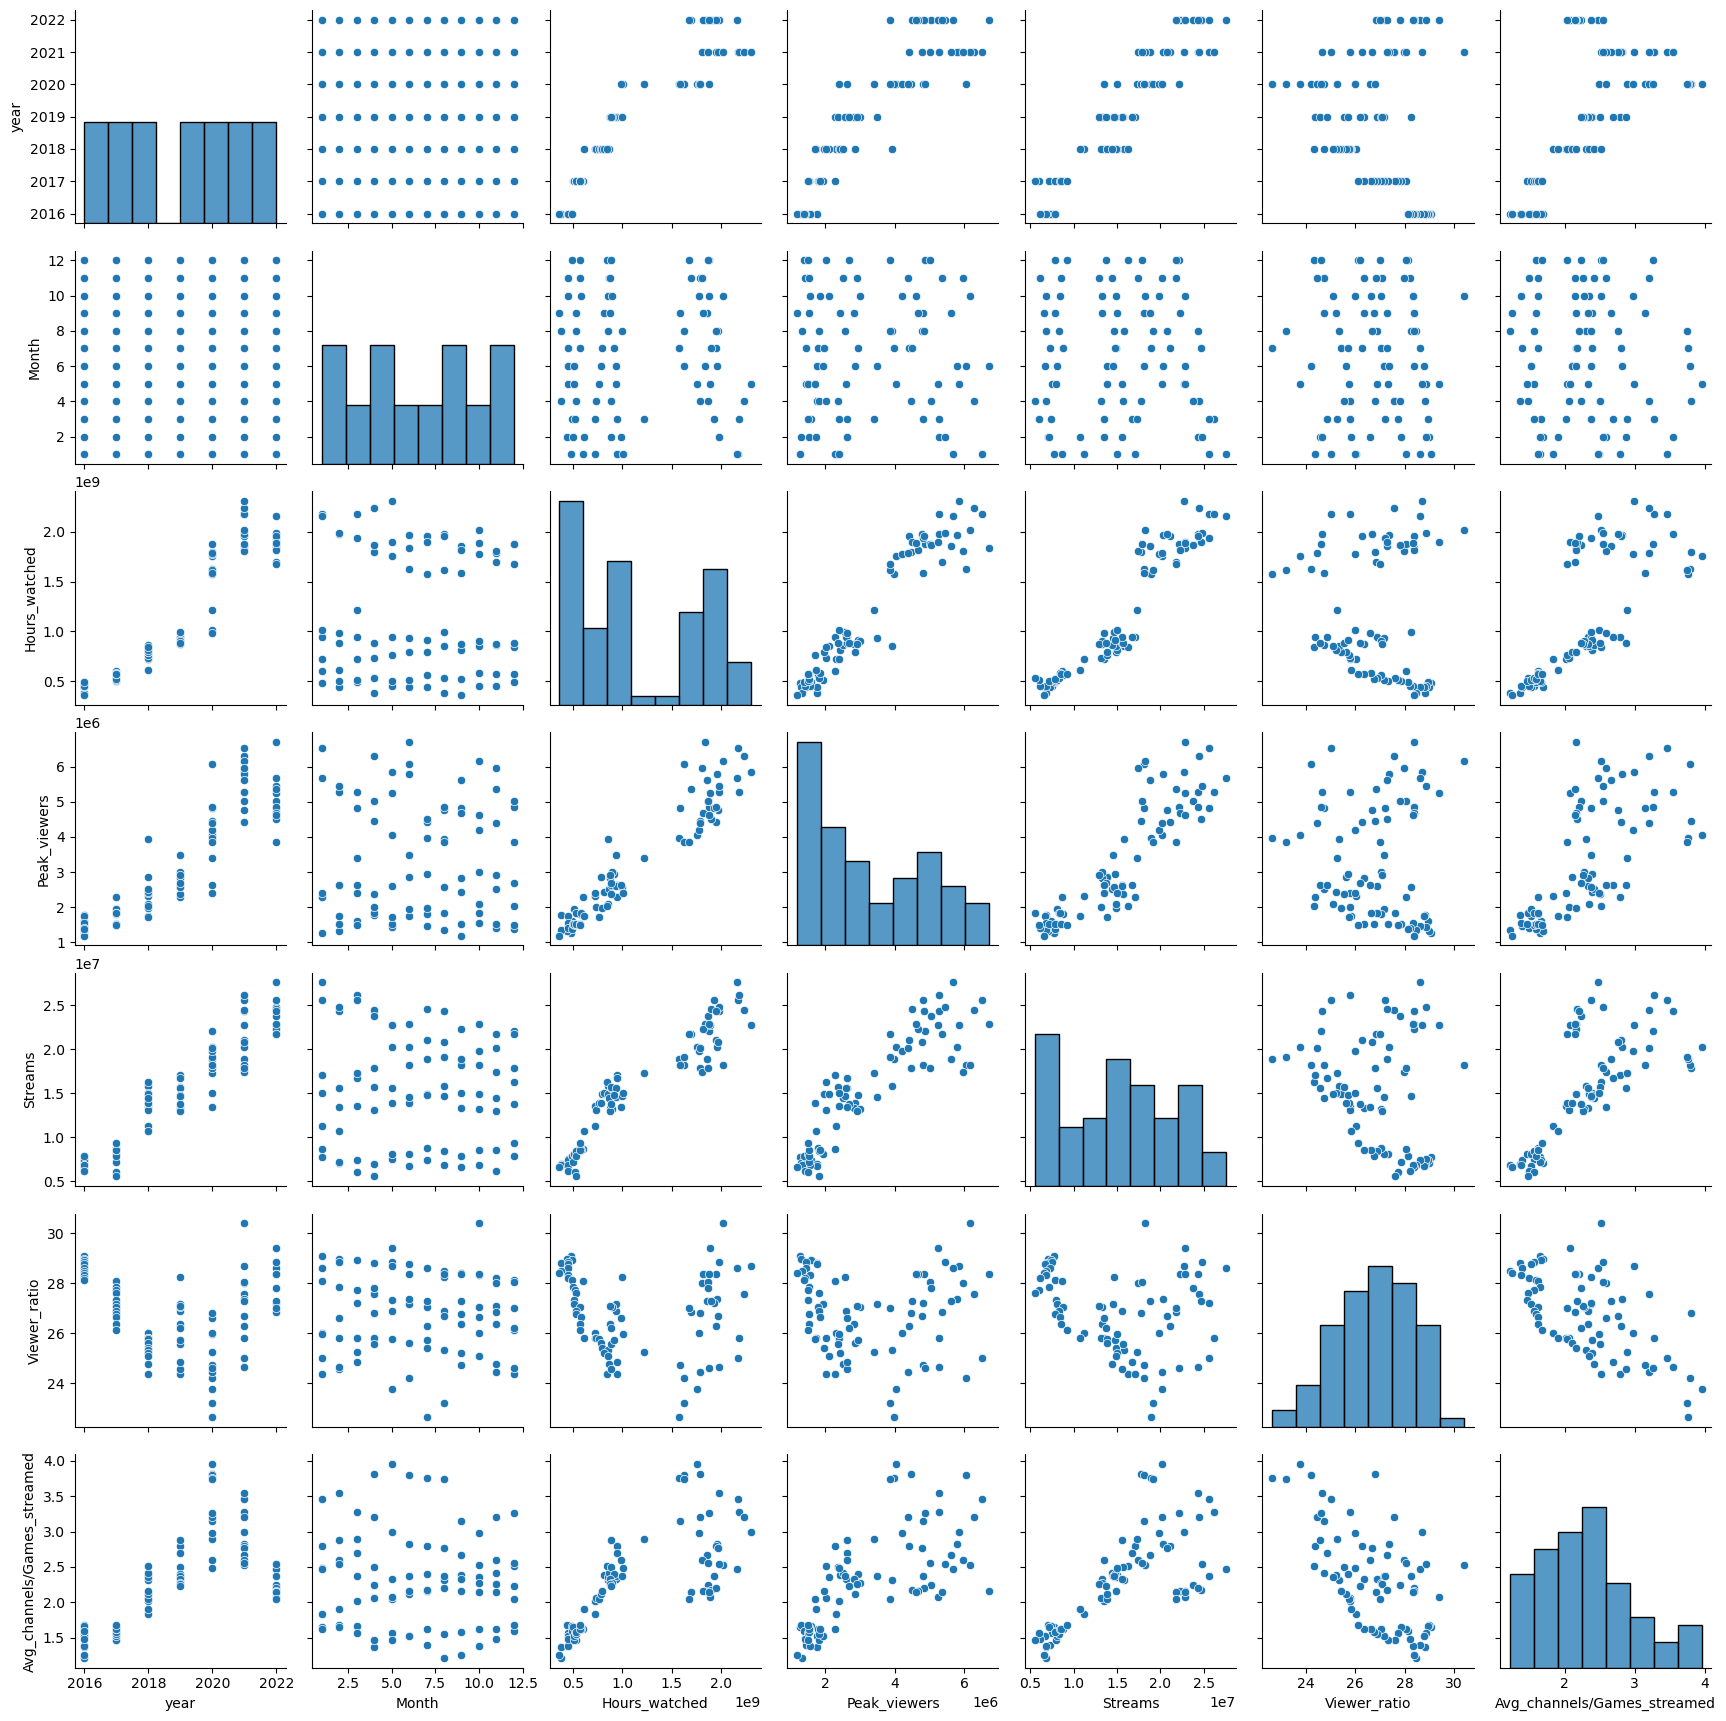

In [19]:
# create a pairplot
sns.pairplot(twitch_global_data)

## Rgression Model

In [20]:
# create a linear regression model to predict hours watched
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# X
X = twitch_global_data.drop(['Hours_watched'], axis=1)

# y
y = twitch_global_data['Hours_watched']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# create the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# predict the test set
y_pred = model.predict(X_test)

## Model Evaluation

In [22]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate the r2 score
r2 = r2_score(y_test, y_pred)

# print the results
print('Mean Squared Error: ', mse)
print('R2 Score: ', r2)

# rmse
rmse = np.sqrt(mse)
print('Root Mean Squared Error: ', rmse)

# error
print('Error: ', rmse/twitch_global_data['Hours_watched'].mean())

Mean Squared Error:  1.0449649966131642e+16
R2 Score:  0.9695527393461232
Root Mean Squared Error:  102223529.41535349
Error:  0.08787505250437423


**Model has an error of 8.8%, which means each prediction  deviates 8.8% from the true values**

In [23]:
# create a regression plot
fig = px.scatter(x=y_test, y=y_pred, trendline='ols', title='Regression Plot')
# label the axes
fig.update_xaxes(title_text='Actual Hours Watched')
fig.update_yaxes(title_text='Predicted Hours Watched')
fig.show()

In [24]:
# Validate the model using cross validation
from sklearn.model_selection import cross_val_score

# create a new model
model = LinearRegression()

# calculate the cross validated scores
scores = cross_val_score(model, X, y, cv=5)

# print the results
print('Cross Validated Scores: ', scores)

# print the mean of the scores
print('Mean Cross Validated Score: ', scores.mean())

# print the standard deviation of the scores
print('Standard Deviation of Cross Validated Scores: ', scores.std())

Cross Validated Scores:  [-3.73772396  0.05352385 -7.10998297 -1.49365883 -0.24729971]
Mean Cross Validated Score:  -2.507028323384055
Standard Deviation of Cross Validated Scores:  2.660508290287804


**The CV Scores tell us the model is not fitting the data well**

In [25]:
# Feature engineering
# sort correlation matrix by target variable
corr['Hours_watched'].sort_values(ascending=False)

Hours_watched                  1.000000
Peak_viewers                   0.953617
Streams                        0.941777
year                           0.933889
Avg_channels/Games_streamed    0.726321
Month                          0.019107
Viewer_ratio                  -0.075718
Name: Hours_watched, dtype: float64

In [26]:
# drop Viewer_ratio and Month
twitch_global_data = twitch_global_data.drop(['Viewer_ratio', 'Month'], axis=1)

In [27]:
# Create a new Linear Regression model
# X
X = twitch_global_data.drop(['Hours_watched'], axis=1)

# y
y = twitch_global_data['Hours_watched']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# predict the test set
y_pred = model.predict(X_test)

# evaluate the model
# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate the r2 score
r2 = r2_score(y_test, y_pred)

# print the results
print('Mean Squared Error: ', mse)
print('R2 Score: ', r2)

# rmse
rmse = np.sqrt(mse)
print('Root Mean Squared Error: ', rmse)

#average hours watched
print('Average Hours Watched: ', twitch_global_data['Hours_watched'].mean())

# error
print('Error: ', rmse/twitch_global_data['Hours_watched'].mean())

Mean Squared Error:  8128593123049847.0
R2 Score:  0.9763156283350198
Root Mean Squared Error:  90158710.74416408
Average Hours Watched:  1163282712.2380953
Error:  0.0775036969050313


**Using Feature Selection, We increased the R Squared and reduced the Error, but the RMSE is slightly worse**

In [28]:
# plot the regression plot
fig = px.scatter(x=y_test, y=y_pred, trendline='ols', title='Regression Plot')
# label the axes
fig.update_xaxes(title_text='Actual Hours Watched')
fig.update_yaxes(title_text='Predicted Hours Watched')
fig.show()

In [29]:
# What features are most important
# X
X = twitch_global_data.drop(['Hours_watched'], axis=1)
# y
y = twitch_global_data['Hours_watched']

# create a new best_model
best_model = LinearRegression()

# fit the best_model
best_model.fit(X, y)

coefficients = pd.DataFrame(best_model.coef_, X.columns, columns=['Coefficient'])

# create a dataframe of the coefficients
coefficients = pd.DataFrame(best_model.coef_, X.columns, columns=['Coefficient'])

# sort the coefficients by their magnitude
coefficients['Coefficient'].abs().sort_values(ascending=False)

# create a bar chart of the coefficients
fig = px.bar(coefficients, x=coefficients.index, y='Coefficient', title='Feature Importance')
fig.show()

In [30]:
# correlation matrix
corr = twitch_global_data.corr()

# sort the correlation matrix by the target variable
corr['Hours_watched'].sort_values(ascending=False)

Hours_watched                  1.000000
Peak_viewers                   0.953617
Streams                        0.941777
year                           0.933889
Avg_channels/Games_streamed    0.726321
Name: Hours_watched, dtype: float64